# Netflix Data: Cleaning, Analysis and Visualization

## Objective
Load, clean, and analyze Netflix Movies and TV Shows dataset to understand:
- Content distribution (Movies vs TV Shows)
- Rating patterns
- Geographic distribution  
- Content trends over time
- Popular genres and directors

## Dataset
Netflix Movies and TV Shows Dataset (netflix1.csv)

In [25]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

print("Libraries imported successfully!")

Libraries imported successfully!


In [26]:
# Loading the Netflix dataset
data = pd.read_csv("netflix1.csv")

# Taking a quick look at the first few records
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [27]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [28]:
# Dataset Shape
print(f"Dataset Shape: {data.shape}")
print(f"Total Rows: {data.shape[0]}")
print(f"Total Columns: {data.shape[1]}")

Dataset Shape: (8790, 10)
Total Rows: 8790
Total Columns: 10


In [29]:
# Check Missing Values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [30]:
# Data Cleaning
# Remove Duplicates
data = data.drop_duplicates()
print(f"Shape after removing duplicates: {data.shape}")

# Convert date_added to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
print("Date conversion completed!")

Shape after removing duplicates: (8790, 10)
Date conversion completed!


In [31]:
# Movies vs TV Shows Count
type_counts = data['type'].value_counts()
print("\nContent Type Distribution:")
print(type_counts)
print(f"\nPercentage:")
print(type_counts / len(data) * 100)


Content Type Distribution:
type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Percentage:
type
Movie      69.692833
TV Show    30.307167
Name: count, dtype: float64


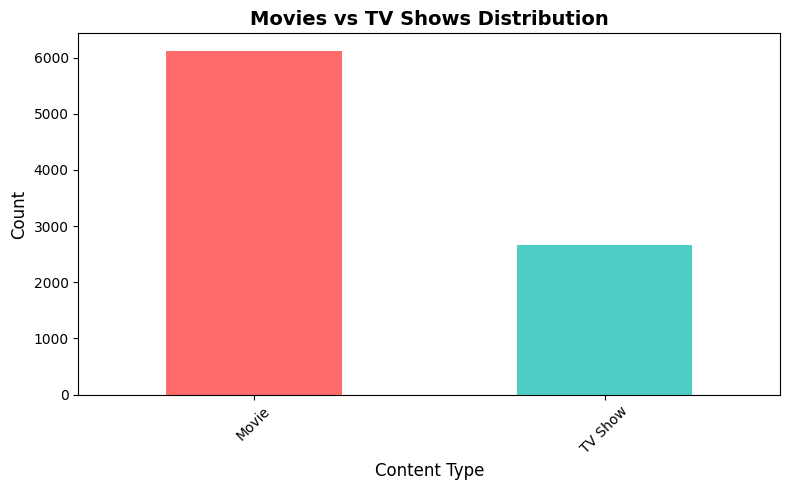

In [32]:
# Bar Chart - Movies vs TV Shows
fig, ax = plt.subplots(figsize=(8, 5))
type_counts.plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4'])
plt.title('Movies vs TV Shows Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

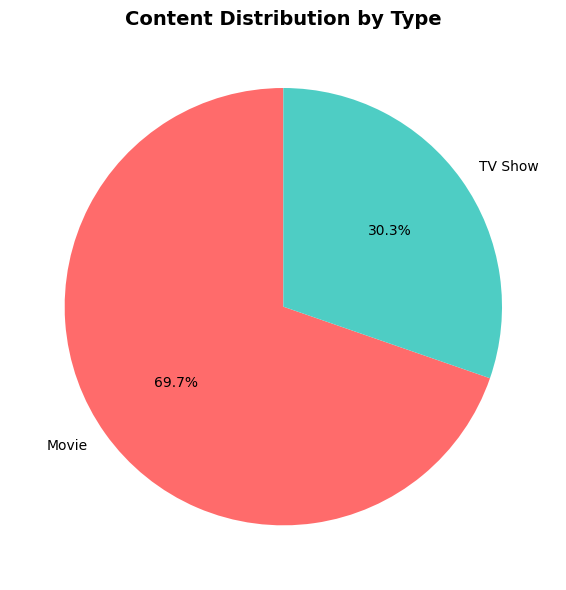

In [33]:
# Pie Chart - Movies vs TV Shows
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#FF6B6B', '#4ECDC4']
type_counts.plot(kind='pie', ax=ax, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Content Distribution by Type', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [34]:
# Ratings Distribution
rating_counts = data['rating'].value_counts()
print("\nRatings Distribution:")
print(rating_counts)
print(f"\nTotal Unique Ratings: {len(rating_counts)}")


Ratings Distribution:
rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Total Unique Ratings: 14


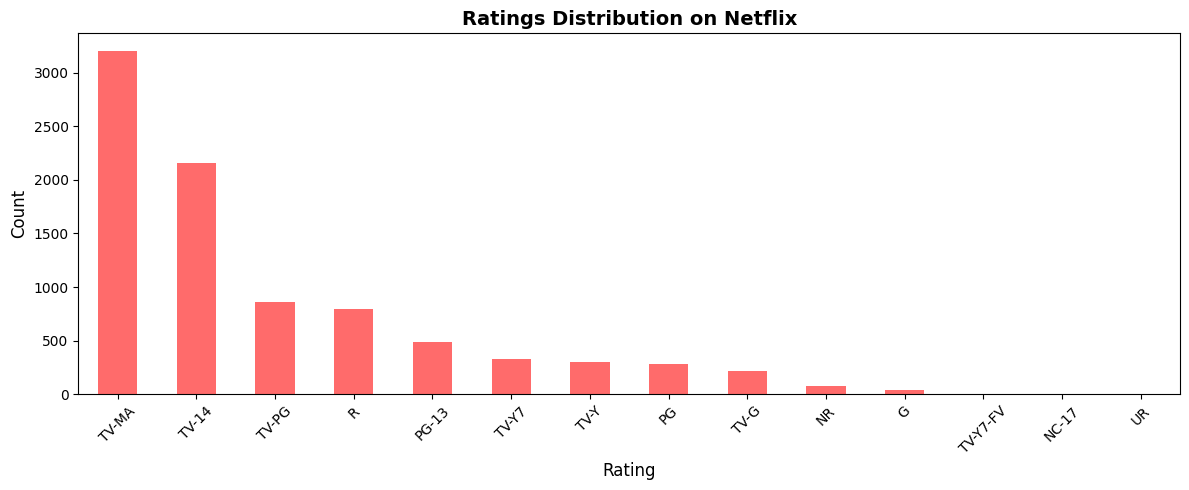

In [35]:
# Bar Chart - Ratings Distribution
fig, ax = plt.subplots(figsize=(12, 5))
rating_counts.plot(kind='bar', ax=ax, color='#FF6B6B')
plt.title('Ratings Distribution on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Country Analysis
# Split countries as they are comma-separated
countries = data['country'].str.split(',', expand=True).stack()
countries = countries.str.strip()
country_counts = countries.value_counts().head(10)
print("\nTop 10 Countries:")
print(country_counts)


Top 10 Countries:
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


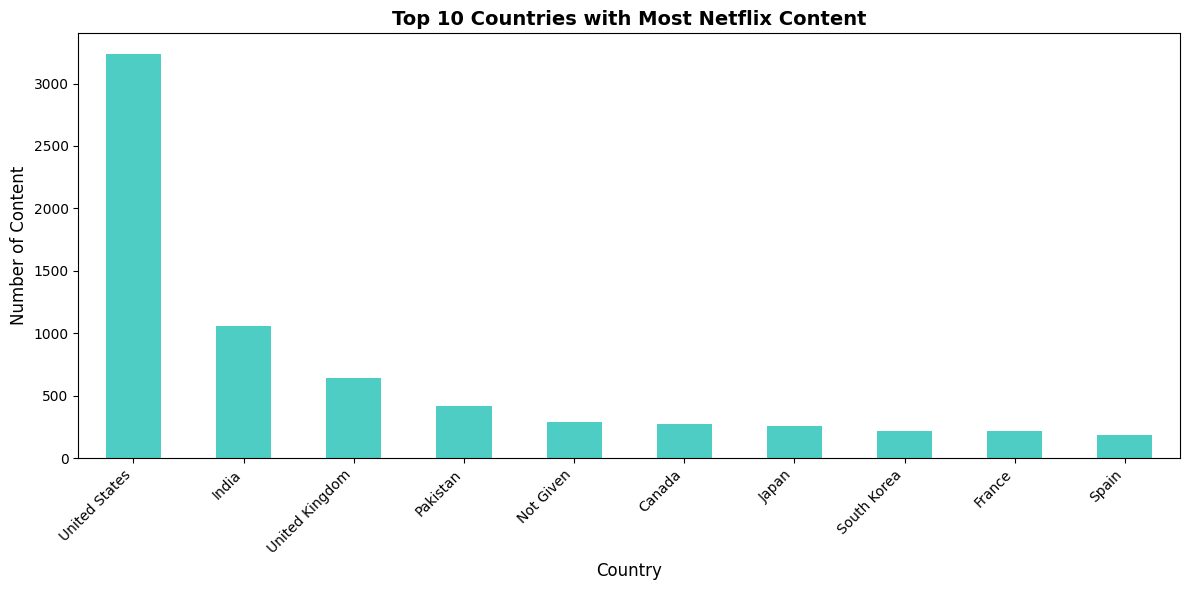

In [37]:
# Bar Chart - Top 10 Countries
fig, ax = plt.subplots(figsize=(12, 6))
country_counts.plot(kind='bar', ax=ax, color='#4ECDC4')
plt.title('Top 10 Countries with Most Netflix Content', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Content', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
# Extract Date Features
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day

print("Date features extracted successfully!")
print(f"\nYear Range: {data['year'].min():.0f} to {data['year'].max():.0f}")

Date features extracted successfully!

Year Range: 2008 to 2021


In [39]:
# Monthly Content Trend
monthly_trend = data.groupby('month')['type'].value_counts().unstack(fill_value=0)
print("\nMonthly Content Distribution:")
print(monthly_trend)


Monthly Content Distribution:
type   Movie  TV Show
month                
1        545      192
2        382      180
3        528      213
4        549      214
5        439      193
6        492      236
7        565      262
8        518      236
9        518      251
10       545      215
11       498      207
12       547      265


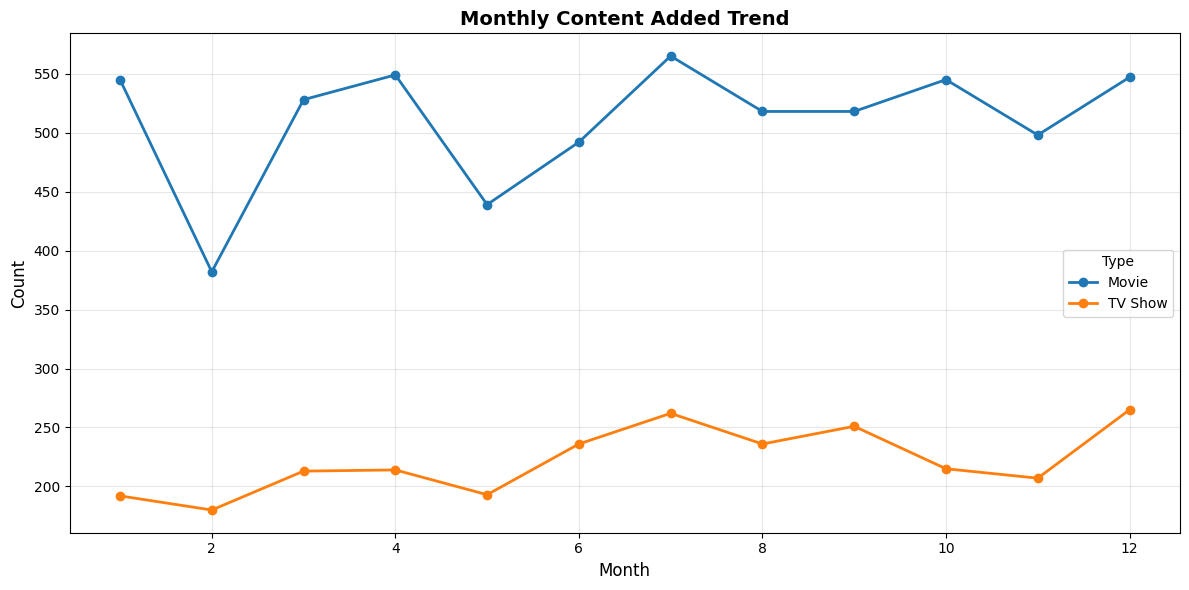

In [40]:
# Line Plot - Monthly Trend
fig, ax = plt.subplots(figsize=(12, 6))
monthly_trend.plot(ax=ax, marker='o', linewidth=2)
plt.title('Monthly Content Added Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Yearly Content Distribution:
type  Movie  TV Show
year                
2008      1        1
2009      2        0
2010      1        0
2011     13        0
2012      3        0
2013      6        5
2014     19        5
2015     56       26
2016    251      175
2017    836      349
2018   1237      411
2019   1424      592
2020   1284      595
2021    993      505


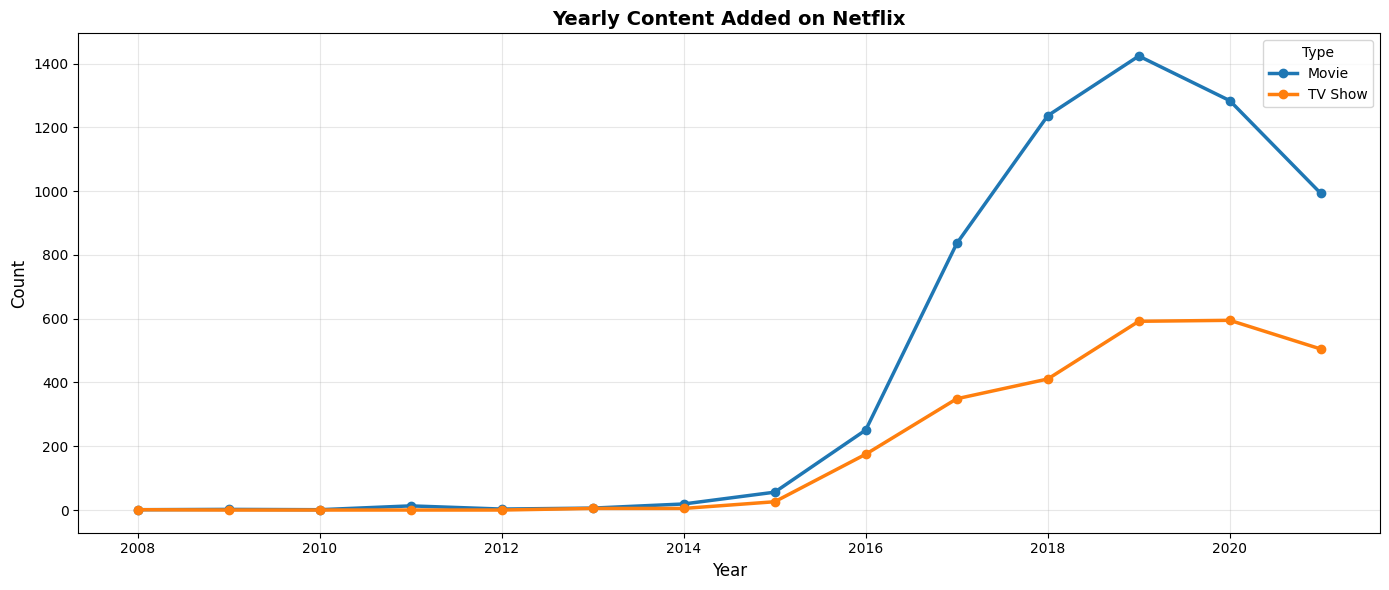

In [41]:
# Yearly Content Trend
yearly_trend = data.groupby('year')['type'].value_counts().unstack(fill_value=0)
print("\nYearly Content Distribution:")
print(yearly_trend)

# Line Plot
fig, ax = plt.subplots(figsize=(14, 6))
yearly_trend.plot(ax=ax, marker='o', linewidth=2.5)
plt.title('Yearly Content Added on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
# Genre Analysis - Movies
movies_data = data[data['type'] == 'Movie'].copy()
# Split genres as they are comma-separated
movie_genres = movies_data['listed_in'].str.split(',', expand=True).stack()
movie_genres = movie_genres.str.strip()
movie_genre_counts = movie_genres.value_counts().head(10)
print("\nTop 10 Movie Genres:")
print(movie_genre_counts)


Top 10 Movie Genres:
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64


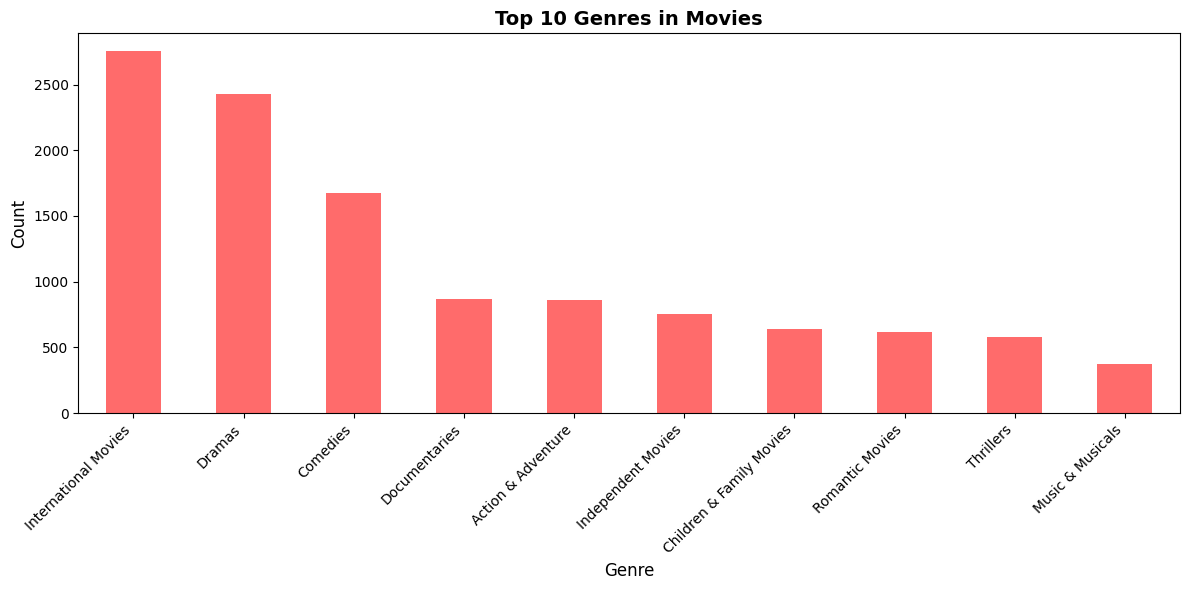

In [43]:
# Bar Chart - Top 10 Movie Genres
fig, ax = plt.subplots(figsize=(12, 6))
movie_genre_counts.plot(kind='bar', ax=ax, color='#FF6B6B')
plt.title('Top 10 Genres in Movies', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 TV Show Genres:
International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
Name: count, dtype: int64


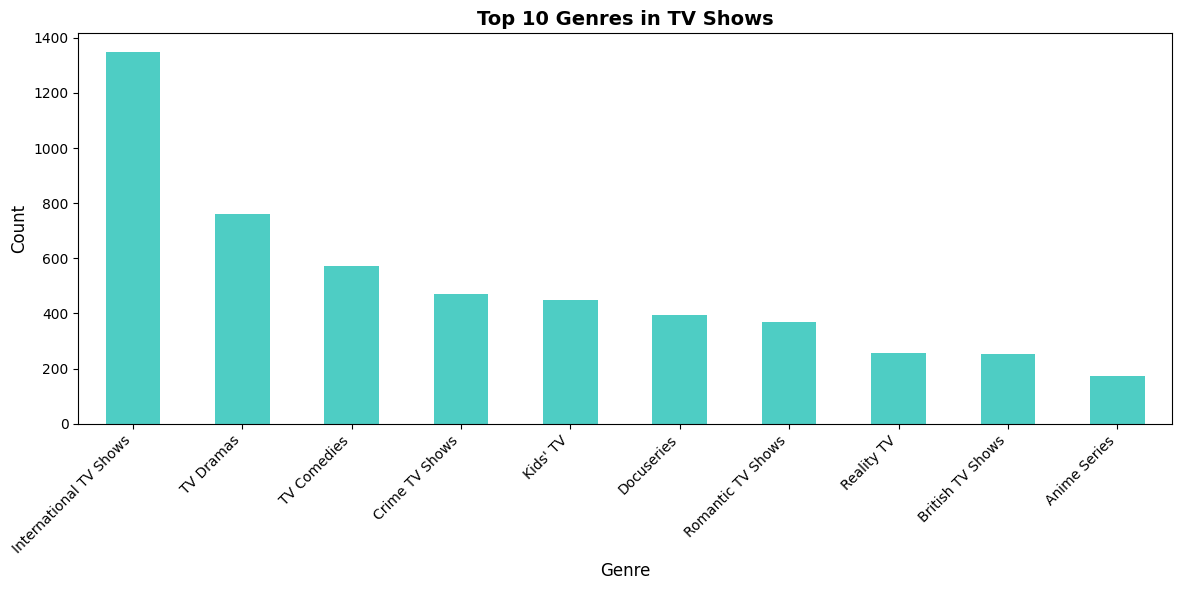

In [44]:
# Genre Analysis - TV Shows
tv_data = data[data['type'] == 'TV Show'].copy()
# Split genres
tv_genres = tv_data['listed_in'].str.split(',', expand=True).stack()
tv_genres = tv_genres.str.strip()
tv_genre_counts = tv_genres.value_counts().head(10)
print("\nTop 10 TV Show Genres:")
print(tv_genre_counts)

# Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))
tv_genre_counts.plot(kind='bar', ax=ax, color='#4ECDC4')
plt.title('Top 10 Genres in TV Shows', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 15 Directors:
Not Given              2588
Rajiv Chilaka            23
Jan Suter                21
Raúl Campos              19
Alastair Fothergill      19
Marcus Raboy             16
Suhas Kadav              16
Jay Karas                15
Cathy Garcia-Molina      13
Jay Chapman              12
Youssef Chahine          12
Martin Scorsese          12
Todd Kauffman            11
Steven Spielberg         11
Mark Thornton            11
Name: count, dtype: int64


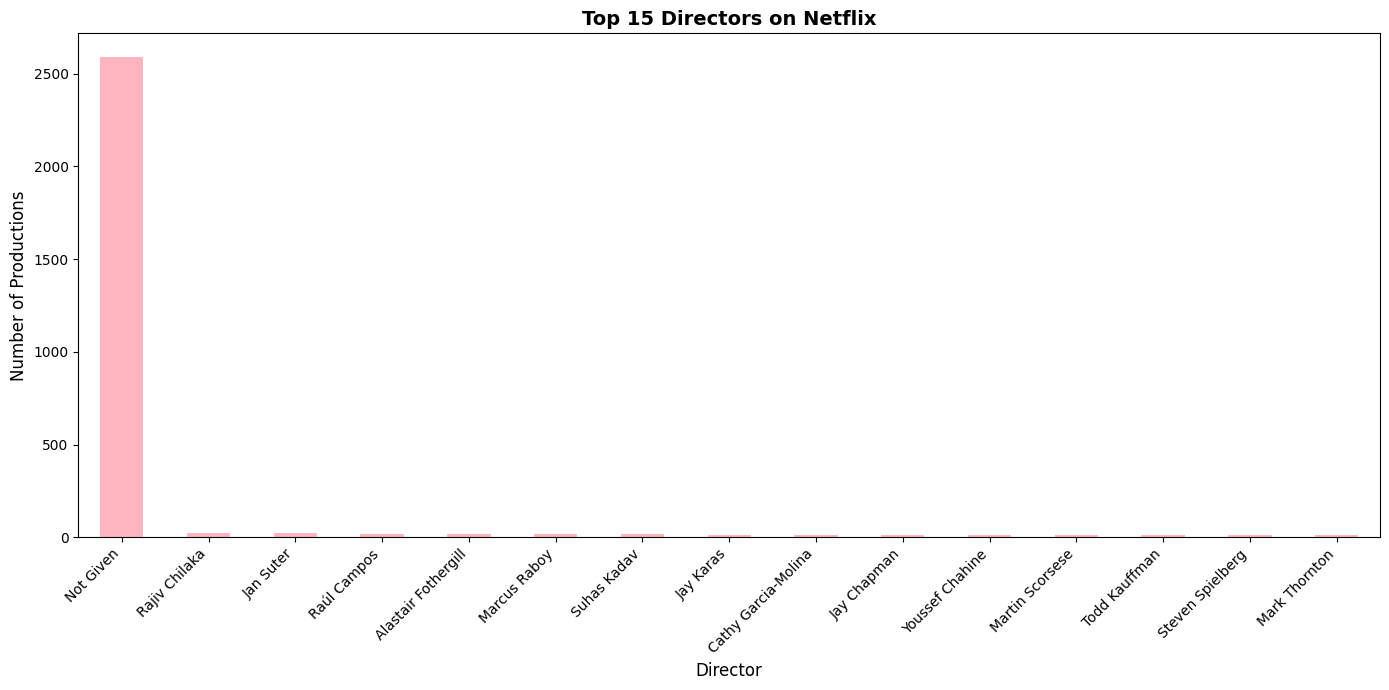

In [45]:
# Director Analysis
# Remove rows with missing directors
directors_data = data[data['director'].notna()].copy()
# Split directors as they are comma-separated
directors = directors_data['director'].str.split(',', expand=True).stack()
directors = directors.str.strip()
director_counts = directors.value_counts().head(15)
print("\nTop 15 Directors:")
print(director_counts)

# Bar Chart
fig, ax = plt.subplots(figsize=(14, 7))
director_counts.plot(kind='bar', ax=ax, color='#FFB6C1')
plt.title('Top 15 Directors on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Productions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

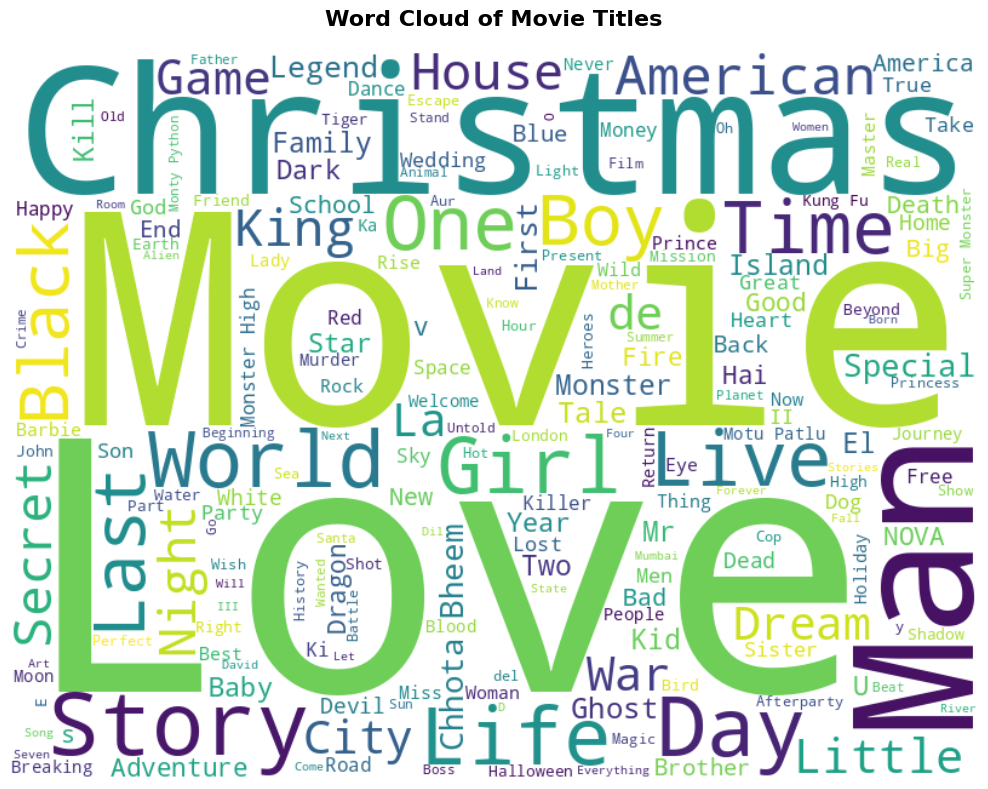


Word cloud generated successfully!


In [46]:
# Word Cloud - Movie Titles
# Get all movie titles
movie_titles = ' '.join(movies_data['title'].astype(str))

# Create word cloud
fig, ax = plt.subplots(figsize=(14, 8))
wordcloud = WordCloud(width=800, height=600, background_color='white', colormap='viridis').generate(movie_titles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
print("\nWord cloud generated successfully!")

## Key Findings and Conclusion

### Data Cleaning Summary
- Loaded 8,790 Netflix content entries with 10 columns
- No missing values detected in the dataset
- No duplicate entries found
- Date format standardized to datetime for temporal analysis

### Content Distribution Insights
1. **Movies dominate Netflix**: 69.7% content (6,126 movies) vs 30.3% TV shows (2,664)
2. **Geographic Dominance**: USA leads with 3,240+ entries, India (1,057), UK (638)
3. **Rating Patterns**: TV-MA most common (3,205), followed by TV-14 (2,157)

### Content Trends Over Time
- Significant acceleration from 2015-2019
- Peak year 2019 with 1,000+ movies and 600+ TV shows
- Consistent monthly additions averaging 500+ content pieces

### Genre Preferences
**Movies**: International Movies (2,752), Dramas (2,426), Comedies (1,674)
**TV Shows**: International TV (1,349), TV Dramas (762), TV Comedies (520)

### Key Insights
- Netflix emphasizes international and diverse content
- Drama and comedy remain most popular genres
- Steady platform growth in both movies and TV shows
- Strong presence from creators across multiple regions

**Analysis demonstrates comprehensive EDA with data cleaning, visualization, and statistical analysis!**